In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os as os
import warnings
warnings.filterwarnings('ignore')


In [53]:
Reorg_folder = "Reorg_Energy/"
Gaussian_folder = "Gaussian_outputs/"
show = True

if show:

    print("Reorg files")
    files = [file.name for file in os.scandir(Reorg_folder)]
    files.sort()
    for file in files:
        print(file)

    print("\n")

    print("Gaussian outputs")
    files = [file.name for file in os.scandir(Gaussian_folder)]
    files.sort()
    for file in files:
        print(file)





Reorg files
Benzene_Conj_0_C0S0_C-1S0
Benzene_Conj_0_C0S0_C0S1
Benzene_Conj_0_C0S0_C1S0
Benzene_Conj_1_C0S0_C-1S0
Benzene_Conj_1_C0S0_C0S1
Benzene_Conj_1_C0S0_C1S0
Benzene_Conj_2_C0S0_C-1S0
Benzene_Conj_2_C0S0_C0S1
Benzene_Conj_2_C0S0_C1S0
Benzene_Conj_3_C0S0_C-1S0
Benzene_Conj_3_C0S0_C0S1
Benzene_Conj_3_C0S0_C1S0
Benzene_Conj_4_C0S0_C-1S0
Benzene_Conj_4_C0S0_C0S1
Benzene_Conj_4_C0S0_C1S0
Benzene_Conj_5_C0S0_C-1S0
Benzene_Conj_5_C0S0_C0S1
Benzene_Conj_5_C0S0_C1S0
Circulene_0_C0S0_C-1S0
Circulene_0_C0S0_C1S0
Circulene_1_C0S0_C1S0
Common_Moeties_0_C0S0_C-1S0
Common_Moeties_0_C0S0_C1S0
Common_Moeties_15_C0S0_C1S0
Common_Moeties_16_C0S0_C1S0
Common_Moeties_18_C0S0_C1S0
Common_Moeties_19_C0S0_C1S0
Common_Moeties_6_C0S0_C1S0
Common_Moeties_7_C0S0_C1S0
IDTBx_1_C-1S0_C0S0
Non-cov-phenyl-N_0_C0S0_C-1S0
Non-cov-phenyl-N_0_C0S0_C0S1
Non-cov-phenyl-N_0_C0S0_C1S0
Non-cov-phenyl-N_1_C0S0_C-1S0
Non-cov-phenyl-N_1_C0S0_C0S1
Non-cov-phenyl-N_1_C0S0_C1S0
Non-cov-phenyl-N_2_C0S0_C-1S0
Non-cov-phenyl-N_2_

In [54]:
Serial_and_info = {
    
    #name         : [Serial,Group,Conjugation,Non-Covalent]
    
    "Benzene"     : ["Benzene_Conj_0","Oligoacene",True,False],
    "Naphthalene" : ["Benzene_Conj_1","Oligoacene",True,False],
    "Anthracene"  : ["Benzene_Conj_2","Oligoacene",True,False],
    "Tetracene"   : ["Benzene_Conj_3","Oligoacene",True,False],
    "Pentacene"   : ["Benzene_Conj_4","Oligoacene",True,False],
    "Hexacene"    : ["Benzene_Conj_5","Oligoacene",True,False],
    
    "Biphenyl"        : ["Phenyls_0","Phenyls",True,False],
    "p-Terphenyl"     : ["Phenyls_1","Phenyls",True,False],
    "p-Quarterphenyl" : ["Phenyls_2","Phenyls",True,True],
    "p-Quinquephenyl" : ["Phenyls_3","Phenyls",True,False],
    "p-Sexiphenyl"    : ["Phenyls_4","Phenyls",True,False],
    
    "[5]circulene (corannulene)" : ["Circulene_0","Circulene",True,False],
    "[6]circulene (coronene)"    : ["Circulene_1","Circulene",True,False],
    
    "Quarterphenyl"                   : ["Non-cov-phenyl-N_0",'Non-Cov Phenyls',False,True],
    "Quarterphenyl-1NH"               : ["Non-cov-phenyl-N_1",'Non-Cov Phenyls',False,True],
    "Quarterphenyl-2NH (Adjacent)"    : ["Non-cov-phenyl-N_2",'Non-Cov Phenyls',False,True],
    "Quarterphenyl-2NH (Across)"      : ["Non-cov-phenyl-N_3",'Non-Cov Phenyls',False,True],
    "Quarterphenyl-3NH"               : ["Non-cov-phenyl-N_4",'Non-Cov Phenyls',False,True],
    
    "Phenothiazine-Pyrene 2" : ["phenothiazine-pyrene_2","Phenothiazine-Pyrene",False,False],
    
    #"PTO"   : ["conjugated_carbonyls_0","Conjugated Carbonyls",False,False],
    #"PhenQ" : ["conjugated_carbonyls_1","Conjugated Carbonyls",False,False],
    #"BDTQ"  : ["conjugated_carbonyls_2","Conjugated Carbonyls",False,False],
    #"PQ"    : ["conjugated_carbonyls_3","Conjugated Carbonyls",False,False],
    
}


MultiIndex_rows = [
#Stores the families/groups that the molecules are in
    
    ('Oligoacene','Benzene'),
    ('Oligoacene','Naphthalene'),
    ('Oligoacene','Anthracene'),
    ('Oligoacene','Tetracene'),
    ('Oligoacene','Pentacene'),
    ('Oligoacene','Hexacene'),
    
    ('Phenyls','Biphenyl'),
    ('Phenyls','p-Terphenyl'),
    ('Phenyls','p-Quarterphenyl'),
    ('Phenyls','p-Quinquephenyl'),
    ('Phenyls','p-Sexiphenyl'),
    
    ('Circulene','[5]circulene (corannulene)'),
    ('Circulene','[6]circulene (coronene)'),
    
    ('Non-Cov Phenyls','Quarterphenyl'),
    ('Non-Cov Phenyls','Quarterphenyl-1NH'),
    ('Non-Cov Phenyls','Quarterphenyl-2NH (Adjacent)'),
    ('Non-Cov Phenyls','Quarterphenyl-2NH (Across)'),
    ('Non-Cov Phenyls','Quarterphenyl-3NH'),
    
    ('Phenothiazine-Pyrene','Phenothiazine-Pyrene 2'),
    
    #('Conjugated Carbonyls','conjugated_carbonyls_0'),
    #('Conjugated Carbonyls','conjugated_carbonyls_1'),
    #('Conjugated Carbonyls','conjugated_carbonyls_2'),
    #('Conjugated Carbonyls','conjugated_carbonyls_3'),
    
    

]


MultiIndex_columns = [
#Stores the families/groups that the molecules are in
    
    ('Reorg Cation','Low_freq'),
    ('Reorg Cation','Mid_freq'),
    ('Reorg Cation','High_freq'),
    ('Reorg Cation','Total'),
    
    ('Reorg Anion','Low_freq'),
    ('Reorg Anion','Mid_freq'),
    ('Reorg Anion','High_freq'),
    ('Reorg Anion','Total'),

    ('Reorg S1','Low_freq'),
    ('Reorg S1','Mid_freq'),
    ('Reorg S1','High_freq'),
    ('Reorg S1','Total'),
    
    ('Molecule Background','N_atoms'),
    ('Molecule Background','Molecular Mass'),
    ('Molecule Background','Homo Energy'),
    ('Molecule Background','Molecular Energy'),
    ('Molecule Background','Dipole Moment'),
    ('Molecule Background','Excited State Energy'),
    ('Molecule Background','Oscillator Strength'),
    
    ('Investigation','Conjugation'),
    ('Investigation','Non-Covalent')
    

]



multi_index_rows = pd.MultiIndex.from_tuples(MultiIndex_rows, names = ["Molecular Group","Molecule"])
multi_index_columns = pd.MultiIndex.from_tuples(MultiIndex_columns)



In [55]:
def Database_construct(Instructions, multi_index_rows, multi_index_columns):
    Database = pd.DataFrame(index = multi_index_rows, columns = multi_index_columns)
    Database.head()
    #for i in range(0,1):
    for i in range(0,len(Instructions)):        
        Mol_name = list(Instructions.keys())[i]
        Mol_serial = Instructions[Mol_name][0]
        Mol_group = Instructions[Mol_name][1]
        Conjugation = Instructions[Mol_name][2]
        NonCov = Instructions[Mol_name][3]


        
#Units 
        cmtoEv = 1.24e-4
        
#Extracting total reorg data
#Cation
        try:
            Cation = pd.read_csv(Reorg_folder+Mol_serial+"_"+"C0S0_C1S0", usecols=['Frequencies', 'Displacement', 'Reorg Energy'])
            Cation_low = Cation[Cation['Frequencies']<500]["Reorg Energy"].sum()*cmtoEv
            Cation_mid = Cation[Cation['Frequencies']<2000][Cation['Frequencies']>=500]["Reorg Energy"].sum()*cmtoEv
            Cation_high = Cation[Cation['Frequencies']>=2000]["Reorg Energy"].sum()*cmtoEv
            Cation_total = Cation["Reorg Energy"].sum()*cmtoEv
        except:
            Cation_low = float('NaN')
            Cation_mid = float('NaN')
            Cation_high = float('NaN')
            Cation_total = float('NaN')
        
        
        try:
            Cation_Gauss = pd.read_csv(Gaussian_folder+Mol_serial+"_"+"C1S0.csv")
            n_atoms = int(Cation_Gauss["n_atoms"])
            molecular_mass = float(Cation_Gauss["molecular_mass"])
            homo_energy = float(Cation_Gauss["homo_energy"])
            scf_energy = float(Cation_Gauss["scf_energy"])
            dipole_moment = np.array(Cation_Gauss["dipole_moment"])[0]
            excited_state_energy = np.array(Cation_Gauss["excited_state_energy"])[0]*cmtoEv
            oscillator_strength = np.array(Cation_Gauss["oscillator_strength"])[0]
        except:
            n_atoms = float('NaN')
            molecular_mass = float('NaN')
            homo_energy = float('NaN')
            scf_energy = float('NaN')
            dipole_moment = float('NaN')
            excited_state_energy = float('NaN')
            oscillator_strength = float('NaN')
 
    
#Anion
        try:
            Anion = pd.read_csv(Reorg_folder+Mol_serial+"_"+"C0S0_C-1S0", usecols=['Frequencies', 'Displacement', 'Reorg Energy'])
            Anion_low = Anion[Anion['Frequencies']<500]["Reorg Energy"].sum()*cmtoEv
            Anion_mid = Anion[Anion['Frequencies']<2000][Anion['Frequencies']>=500]["Reorg Energy"].sum()*cmtoEv
            Anion_high = Anion[Anion['Frequencies']>=2000]["Reorg Energy"].sum()*cmtoEv
            Anion_total = Anion["Reorg Energy"].sum()*cmtoEv
            
        except:
            Anion_low = float('NaN')
            Anion_mid = float('NaN')
            Anion_high = float('NaN')
            Anion_total = float('NaN')

            
        try:
            Anion_Gauss = pd.read_csv(Gaussian_folder+Mol_serial+"_"+"C-1S0.csv")
            n_atoms = int(Anion_Gauss["n_atoms"])
            molecular_mass = float(Anion_Gauss["molecular_mass"])
            homo_energy = float(Anion_Gauss["homo_energy"])
            scf_energy = float(Anion_Gauss["scf_energy"])
            dipole_moment = np.array(Anion_Gauss["dipole_moment"])[0]
            excited_state_energy = np.array(Anion_Gauss["excited_state_energy"])[0]*cmtoEv
            oscillator_strength = np.array(Anion_Gauss["oscillator_strength"])[0]
        except:
            pass

#Excited

        try:
            Excited = pd.read_csv(Reorg_folder+Mol_serial+"_"+"C0S0_C0S1", usecols=['Frequencies', 'Displacement', 'Reorg Energy'])
            Excited_low = Excited[Excited['Frequencies']<500]["Reorg Energy"].sum()*cmtoEv
            Excited_mid = Excited[Excited['Frequencies']<2000][Excited['Frequencies']>=500]["Reorg Energy"].sum()*cmtoEv
            Excited_high = Excited[Excited['Frequencies']>=2000]["Reorg Energy"].sum()*cmtoEv
            Excited_total = Excited["Reorg Energy"].sum()*cmtoEv
        except:
            Excited_low = float('NaN')
            Excited_mid = float('NaN')
            Excited_high = float('NaN')
            Excited_total = float('NaN')

        try:
            Excited_Gauss = pd.read_csv(Gaussian_folder+Mol_serial+"_"+"C0S1.csv")
            n_atoms = int(Excited_Gauss["n_atoms"])
            molecular_mass = float(Excited_Gauss["molecular_mass"])
            homo_energy = float(Excited_Gauss["homo_energy"])
            scf_energy = float(Excited_Gauss["scf_energy"])
            dipole_moment = np.array(Excited_Gauss["dipole_moment"])[0]
            excited_state_energy = np.array(Excited_Gauss["excited_state_energy"])[0]*cmtoEv
            oscillator_strength = np.array(Excited_Gauss["oscillator_strength"])[0]
        except:
            pass
  
            
        #Extracting gaussian information
        


        Database.loc[Mol_group,Mol_name] = [Cation_low, Cation_mid, Cation_high, Cation_total,\
                                            Anion_low, Anion_mid, Anion_high, Anion_total,\
                                            Excited_low, Excited_mid, Excited_high, Excited_total,\
                                            n_atoms, molecular_mass, homo_energy, scf_energy, dipole_moment,\
                                            excited_state_energy, oscillator_strength,\
                                            Conjugation, NonCov]

        
    return Database


In [56]:
Database = 0
Database = Database_construct(Serial_and_info, multi_index_rows, multi_index_columns)
Database



Reorg Cation            \
                                                      Low_freq  Mid_freq   
Molecular Group      Molecule                                              
Oligoacene           Benzene                               0.0  0.300328   
                     Naphthalene                           0.0  0.186732   
                     Anthracene                       0.000012  0.140839   
                     Tetracene                         0.00067   0.11501   
                     Pentacene                        0.002034   0.09486   
                     Hexacene                          0.00315  0.079472   
Phenyls              Biphenyl                         0.046934  0.216975   
                     p-Terphenyl                      0.047306  0.187686   
                     p-Quarterphenyl                  0.047281  0.163841   
                     p-Quinquephenyl                  0.043474  0.144373   
                     p-Sexiphenyl                     0.040052  0.127832   
Circulene            [5]circulene (corannulene)       0.038762  0.156699   
                     [6]circulene (coronene)          0.019604  0.110596   
Non-Cov Phenyls      Quarterphenyl                    0.047281  0.163841   
                     Quarterphenyl-1NH                0.045223  0.165168   
                     Quarterphenyl-2NH (Adjacent)     0.044752  0.151726   
                     Quarterphenyl-2NH (Across)       0.046723  0.156872   
                     Quarterphenyl-3NH                0.048496  0.145539   
Phenothiazine-Pyrene Phenothiazine-Pyrene 2           0.025172  0.072949   

                                                                       \
                                                  High_freq     Total   
Molecular Group      Molecule                                           
Oligoacene           Benzene                       0.001017  0.301345   
                     Naphthalene                   0.000781  0.187513   
                     Anthracene                    0.000521  0.141372   
                     Tetracene                     0.000459  0.116138   
                     Pentacene                     0.000434  0.097328   
                     Hexacene                       0.00031  0.082931   
Phenyls              Biphenyl                      0.001029  0.264938   
                     p-Terphenyl                   0.001141  0.236133   
                     p-Quarterphenyl               0.000992  0.212114   
                     p-Quinquephenyl               0.001042  0.188889   
                     p-Sexiphenyl                  0.000781  0.168665   
Circulene            [5]circulene (corannulene)    0.000632  0.196094   
                     [6]circulene (coronene)       0.001141  0.131341   
Non-Cov Phenyls      Quarterphenyl                 0.000992  0.212114   
                     Quarterphenyl-1NH              0.00098   0.21137   
                     Quarterphenyl-2NH (Adjacent)  0.000893  0.197371   
                     Quarterphenyl-2NH (Across)    0.000918  0.204513   
                     Quarterphenyl-3NH             0.000583  0.194618   
Phenothiazine-Pyrene Phenothiazine-Pyrene 2        0.000397  0.098518   

                                                  Reorg Anion            \
                                                     Low_freq  Mid_freq   
Molecular Group      Molecule                                             
Oligoacene           Benzene                              0.0  0.000521   
                     Naphthalene                          0.0  0.262235   
                     Anthracene                      0.056718  0.146122   
                     Tetracene                       0.045409  0.119772   
                     Pentacene                       0.036481  0.098493   
                     Hexacene                        0.030231  0.082448   
Phenyls              Biphenyl                        0.012648  0.328501   
                    

In [7]:
Database.loc["Phenothiazine-Pyrene"]

Reorg Cation                                  \
                           Low_freq   Mid_freq  High_freq     Total   
Molecule                                                              
Phenothiazine-Pyrene 2     0.025172  0.0729492  0.0003968  0.098518   

                       Reorg Anion                          Reorg S1           \
                          Low_freq Mid_freq High_freq Total Low_freq Mid_freq   
Molecule                                                                        
Phenothiazine-Pyrene 2         NaN      NaN       NaN   NaN      NaN      NaN   

                        ...       Molecule Background                 \
                        ... Total             N_atoms Molecular Mass   
Molecule                ...                                            
Phenothiazine-Pyrene 2  ...   NaN                  57        950.279   

                                                     \
                       Homo Energy Molecular Energy   
Molecule                                              
Phenothiazine-Pyrene 2    -8.03688         -47926.2   

                                                                        \
                                    Dipole Moment Excited State Energy   
Molecule                                                                 
Phenothiazine-Pyrene 2  [-2.3398 -0.731   0.    ]                  NaN   

                                           Investigation               
                       Oscillator Strength   Conjugation Non-Covalent  
Molecule                                                               
Phenothiazine-Pyrene 2                 NaN         False        False  

[1 rows x 21 columns]

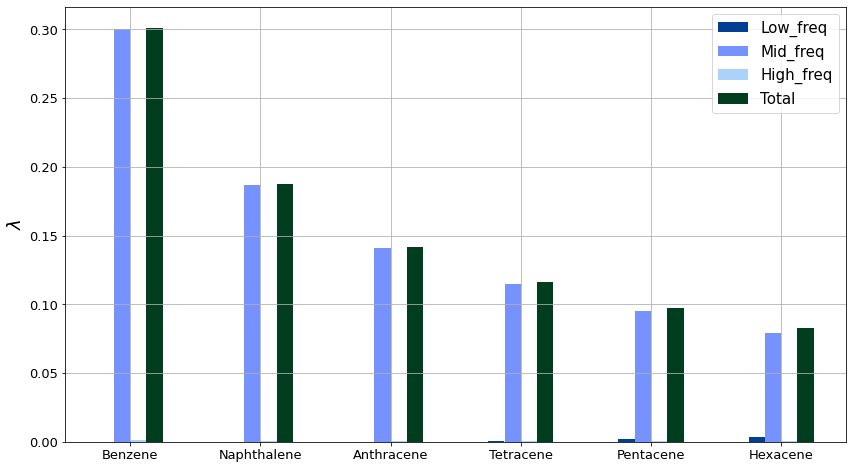

In [82]:

freq_colors = ["#003F91","#7692FF", "#ABD2FA", "#003E1F"]
low_freq = "#003F91"
Database.loc["Oligoacene"]["Reorg Cation"].plot.bar(figsize=(14,8), color=freq_colors)
plt.legend(prop={'size': 15})
plt.xticks(rotation=0, size=13)
plt.yticks(rotation=0, size=13)
plt.ylabel("$\lambda$", fontsize=18)
plt.xlabel("")
plt.grid()


In [75]:
Database[Database["Molecule Background"]["Molecular Mass"]== Database["Molecule Background"]["Molecular Mass"].max()]

Reorg Cation                      Reorg Anion  \
                                 Low_freq  Mid_freq  High_freq    Low_freq   
Molecular Group Molecule                                                     
Phenyls         p-Sexiphenyl     0.040052  0.127832  0.0007812    0.003472   

                                                    Reorg S1            \
                              Mid_freq  High_freq   Low_freq  Mid_freq   
Molecular Group Molecule                                                 
Phenyls         p-Sexiphenyl  0.191382  0.0007068  0.0158968  0.375621   

                                        Molecule Background                 \
                              High_freq             N_atoms Molecular Mass   
Molecular Group Molecule                                                     
Phenyls         p-Sexiphenyl  0.0001736                  62        458.203   

                                                                          \
                             Homo Energy Molecular Energy  Dipole Moment   
Molecular Group Molecule                                                   
Phenyls         p-Sexiphenyl    -5.27302         -37764.9  [-0.  0.  0.]   

                             Investigation               
                               Conjugation Non-Covalent  
Molecular Group Molecule                                 
Phenyls         p-Sexiphenyl          True        False

## Some documentation

### Units:
- All Energies are in eVs.

- Molecular masses are in Daltons

- Dipole Moments are in a.u.

### Other:
The molecular energy is the energy of the right most calculated state. (Excited overwrites Anion overwrites Cation)


In [49]:
cmtoEv = 1.24e-4
a = pd.read_csv('Reorg_Energy/conjugated_carbonyls_0_C-2S0_C-3S0')["Reorg Energy"].sum()*cmtoEv
b = pd.read_csv('Reorg_Energy/conjugated_carbonyls_1_C-2S0_C-3S0')["Reorg Energy"].sum()*cmtoEv
c = pd.read_csv('Reorg_Energy/conjugated_carbonyls_2_C-2S0_C-3S0')["Reorg Energy"].sum()*cmtoEv
d = pd.read_csv('Reorg_Energy/conjugated_carbonyls_3_C-2S0_C-3S0')["Reorg Energy"].sum()*cmtoEv

anion_energy = [a,b,c,d]
names = ["PTO", "PhenQ", "BDTQ", "BQ"]
plt.bar(names, anion_energy)
plt.ylabel("Anion reorg energy (eV)")
plt.title("-1 to -2")

FileNotFoundError: [Errno 2] No such file or directory: 'Reorg_Energy/conjugated_carbonyls_0_C-2S0_C-3S0'